In [6]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def count_numeric_subfolders(folder_path):
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"エラー: 指定されたパスが見つかりません: {folder_path}")
    if not os.path.isdir(folder_path):
        raise NotADirectoryError(f"エラー: 指定されたパスはフォルダではありません: {folder_path}")
    numeric_folder_count = 0
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isdir(item_path) and item.isdigit():
            numeric_folder_count += 1
    return numeric_folder_count

In [3]:
def filter_co_occur(data, sample_name, data_len, max_co_occur, out_num):
    filted_data = []
    filted_sample_name = []
    filted_data_len = []
    for i in range(len(data)):
        compare = 0
        for j in range(len(data[i])):
            mutation = data[i][j].split(',')
            if compare < len(mutation):
                compare = len(mutation)
        if compare <= max_co_occur:
            filted_data.append(data[i])
            filted_sample_name.append(sample_name[i])
            filted_data_len.append(data_len[i])
        if len(filted_data) >= out_num:
            break
    return filted_data, filted_sample_name, filted_data_len

In [4]:
def import_mutation_paths(base_dir, strain):
    """
    指定されたstrainディレクトリからmutation_paths_"strain".tsvを読み込む。

    Parameters:
        base_dir (str): ベースディレクトリのパス。
        strain (str): 読み込み対象のstrain名。

    Returns:
        list: 読み込んだTSVファイルのパスのリスト。
    """
    # ホームディレクトリを展開
    base_dir = os.path.expanduser(base_dir)
    strain_dir = os.path.join(base_dir, strain)

    # strain直下のファイルパスを確認
    file_paths = []
    file_path = os.path.join(strain_dir, f"mutation_paths_{strain}.tsv")
    if os.path.exists(file_path):
        file_paths.append(file_path)
    
    # strain/numサブディレクトリを探索
    else:
        if os.path.exists(strain_dir) and os.path.isdir(strain_dir):
            num_dirs = [d for d in os.listdir(strain_dir) if d.isdigit()]
            num_dirs.sort(key=int)  # 数字順にソート

            for num in num_dirs:
                file_path = os.path.join(strain_dir, num, f"mutation_paths_{strain}.tsv")
                if os.path.exists(file_path):
                    file_paths.append(file_path)

    if not file_paths:
        raise FileNotFoundError(f"mutation_paths_{strain}.tsvが{strain_dir}内に見つかりませんでした。")

    return file_paths


In [13]:
if __name__ == "__main__":
    # --- データ読み込み・前処理 ---
    dir = '../usher_output/'
    files =  sorted([filename for filename in os.listdir(dir) if not filename.startswith('.')])
    print(files)
    print(len(files))

    strains = files
    out_num = 1000000
    max_co_occur = 5

    # 全件データの読み込み
    names = []
    lengths = []
    paths = []
    path_strains = []

    strains_name = []
    strains_num = []
    for strain in strains:
        strain_num = 0
        file_paths = import_mutation_paths(dir,strain)
        for file_path in file_paths:
            #print(f"[INFO]import: {file_path}")
            f = open(file_path, 'r',encoding="utf-8_sig")
            datalist = f.readlines()
            f.close()
            for i in range(1,len(datalist)):
                data = datalist[i].split('\t')
                names.append(data[0])
                lengths.append(int(data[1]))
                paths.append(data[2].rstrip().split('>'))
                path_strains.append(strain)
                strain_num += 1
        print(f"[INFO]{strain} : {strain_num} samples loaded")
        strains_name.append(strain)
        strains_num.append(strain_num)
        
    print(f"[INFO] 全件読み込み完了: {len(paths)} サンプル")
    #filtered_paths, filtered_name, filtered_length = filter_co_occur(paths, names, lengths, max_co_occur, out_num)
    #print(f"[INFO] 共起数フィルタリング完了: {len(filtered_paths)} サンプル")
    max_timestep=max(lengths)

['A', 'A.1', 'AD.2', 'AY.1', 'AY.10', 'AY.100', 'AY.107', 'AY.109', 'AY.110', 'AY.111', 'AY.112', 'AY.113', 'AY.114', 'AY.116.1', 'AY.117', 'AY.118', 'AY.119', 'AY.119.2', 'AY.120', 'AY.120.1', 'AY.120.2.1', 'AY.121', 'AY.121.1', 'AY.122', 'AY.122.3', 'AY.124', 'AY.125', 'AY.126', 'AY.127', 'AY.129', 'AY.13', 'AY.14', 'AY.16', 'AY.2', 'AY.20', 'AY.23', 'AY.25', 'AY.25.1', 'AY.25.3', 'AY.26', 'AY.29', 'AY.3', 'AY.3.1', 'AY.32', 'AY.33', 'AY.34', 'AY.34.1', 'AY.35', 'AY.36', 'AY.36.1', 'AY.37', 'AY.39', 'AY.39.1', 'AY.39.1.1', 'AY.4', 'AY.4.1', 'AY.4.10', 'AY.4.15', 'AY.4.2', 'AY.4.2.1', 'AY.4.2.2', 'AY.4.2.3', 'AY.4.3', 'AY.4.4', 'AY.4.5', 'AY.4.6', 'AY.4.7', 'AY.4.8', 'AY.4.9', 'AY.41', 'AY.42', 'AY.43', 'AY.43.4', 'AY.43.6', 'AY.43.8', 'AY.44', 'AY.45', 'AY.46', 'AY.46.1', 'AY.46.4', 'AY.46.5', 'AY.46.6', 'AY.47', 'AY.48', 'AY.5', 'AY.5.3', 'AY.5.4', 'AY.54', 'AY.57', 'AY.6', 'AY.62', 'AY.64', 'AY.65', 'AY.67', 'AY.7', 'AY.7.1', 'AY.70', 'AY.8', 'AY.80', 'AY.84', 'AY.9', 'AY.9.2', 'AY

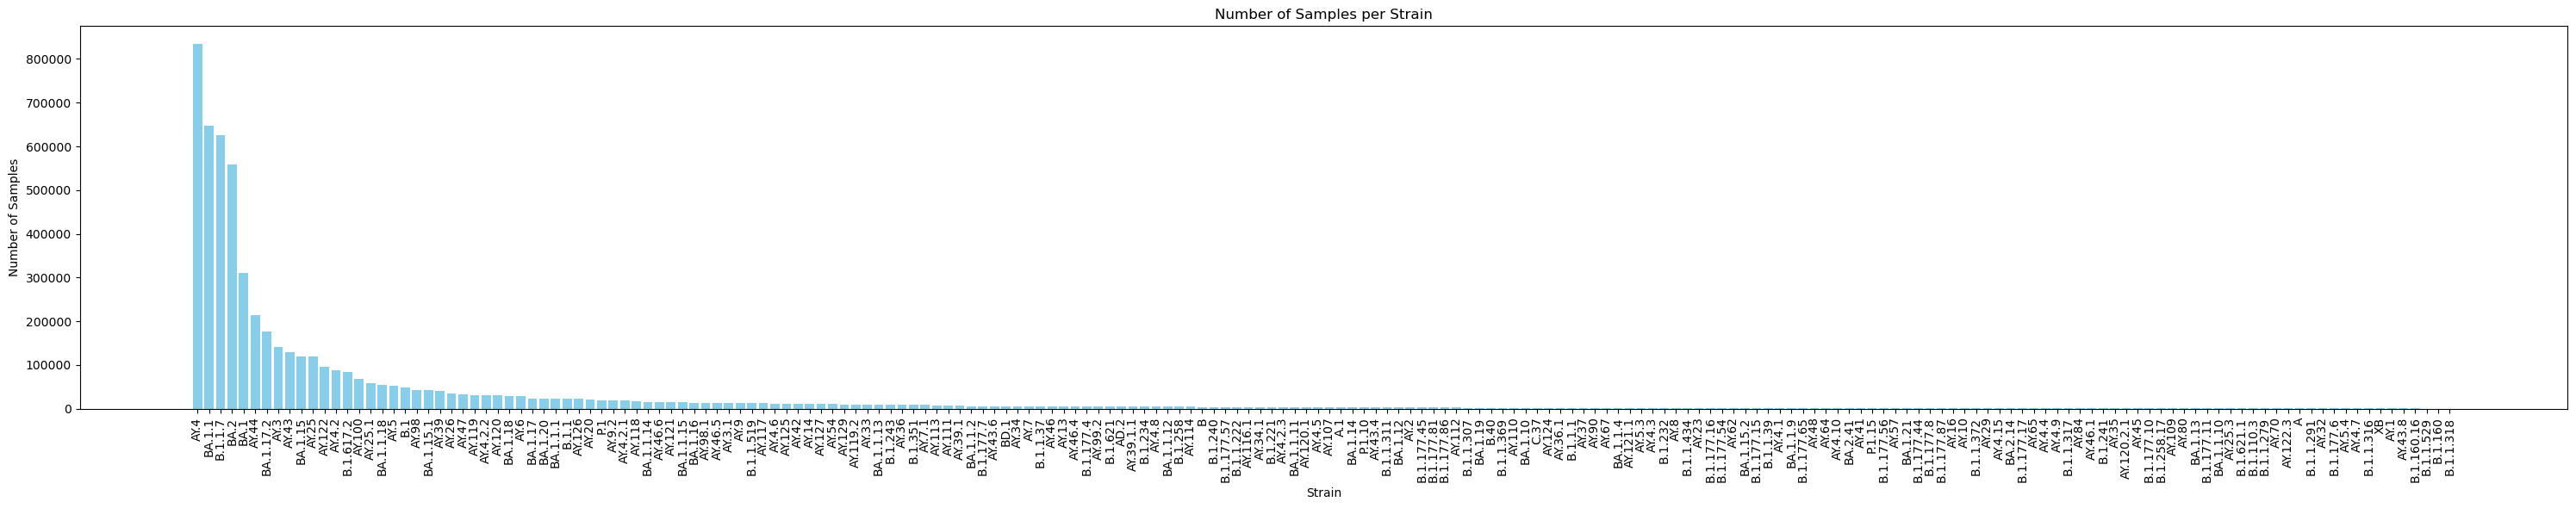

In [12]:
df = pd.DataFrame({'Strain': strains_name, 'Sample_Count': strains_num})
sorted_df = df.sort_values(by='Sample_Count', ascending=False)
plt.figure(figsize=(30, 6))
plt.bar(sorted_df['Strain'], sorted_df['Sample_Count'], color='skyblue')
plt.xlabel('Strain')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Strain')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Initial samples loaded: 5606659
Samples after removing duplicate sequences: 2767140


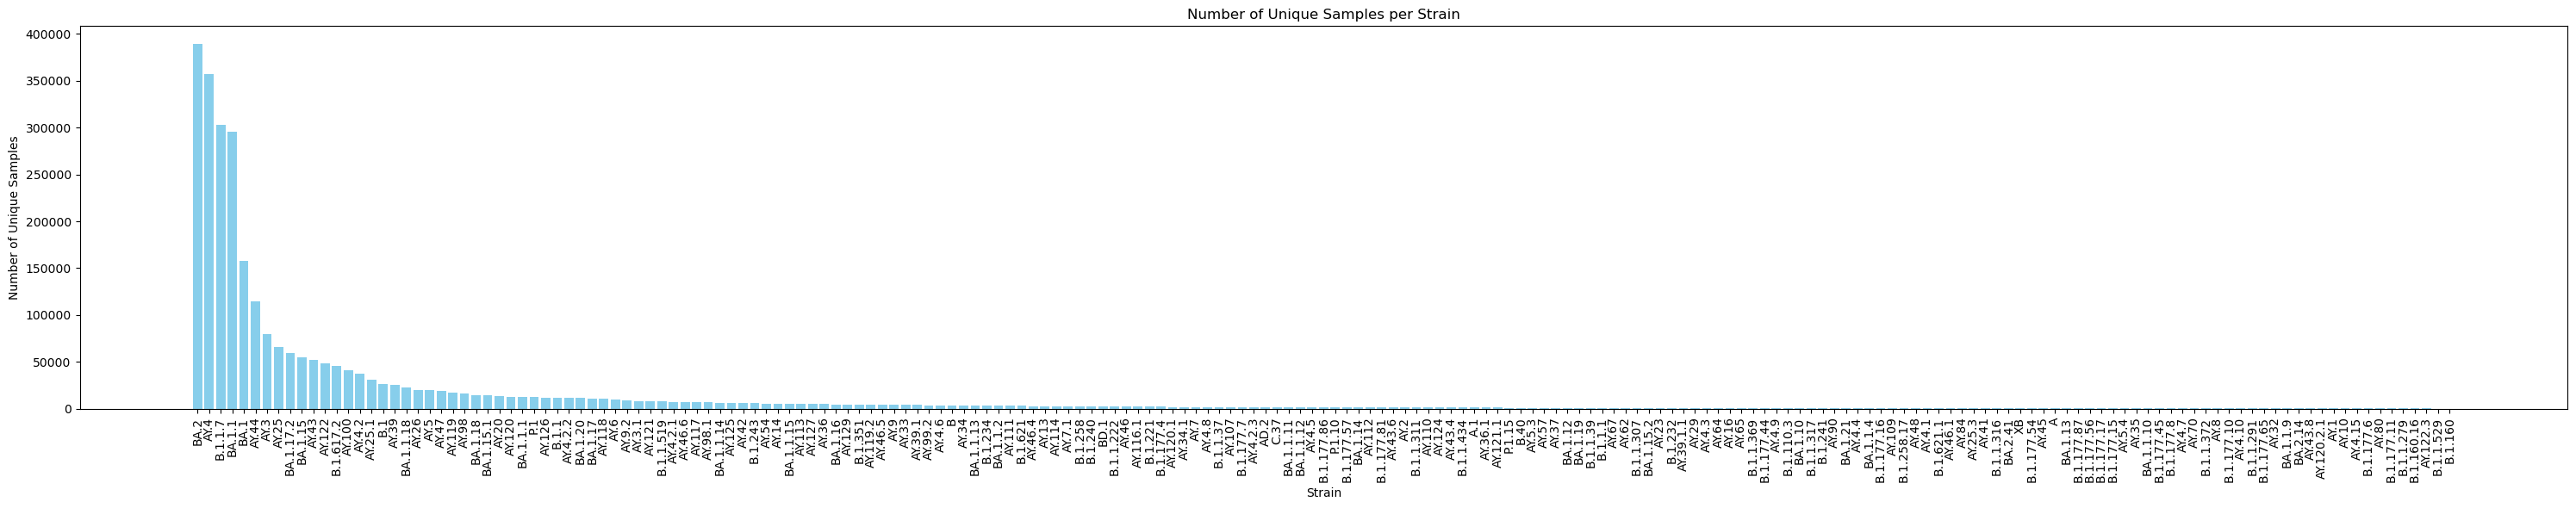

In [15]:
def filter_unique(strains, names, lengths, mutation_paths):
    df = pd.DataFrame({'strain': strains, 'name': names, 'original_len': lengths, 'path': mutation_paths})
    print(f"Initial samples loaded: {len(df)}")

    # リストをタプルに変換した列を一時的に作成
    df['path_tuple'] = df['path'].apply(tuple)
    
    # 'path_tuple' 列に基づいて重複を削除 (最初の出現を残す)
    df_unique = df.drop_duplicates(subset='path_tuple', keep='first')
    print(f"Samples after removing duplicate sequences: {len(df_unique)}")
    
    # 一時的な列を削除
    df_filtered = df_unique.drop(columns=['path_tuple'])

    return df_filtered


df_filtered = filter_unique(path_strains, names, lengths, paths)

df_strains = df_filtered['strain'].value_counts().reset_index()
df_strains.columns = ['Strain', 'Unique_Sample_Count']
df_strains = df_strains.sort_values(by='Unique_Sample_Count', ascending=False)
plt.figure(figsize=(30, 6))
plt.bar(df_strains['Strain'], df_strains['Unique_Sample_Count'], color='skyblue')
plt.xlabel('Strain')
plt.ylabel('Number of Unique Samples')
plt.title('Number of Unique Samples per Strain')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

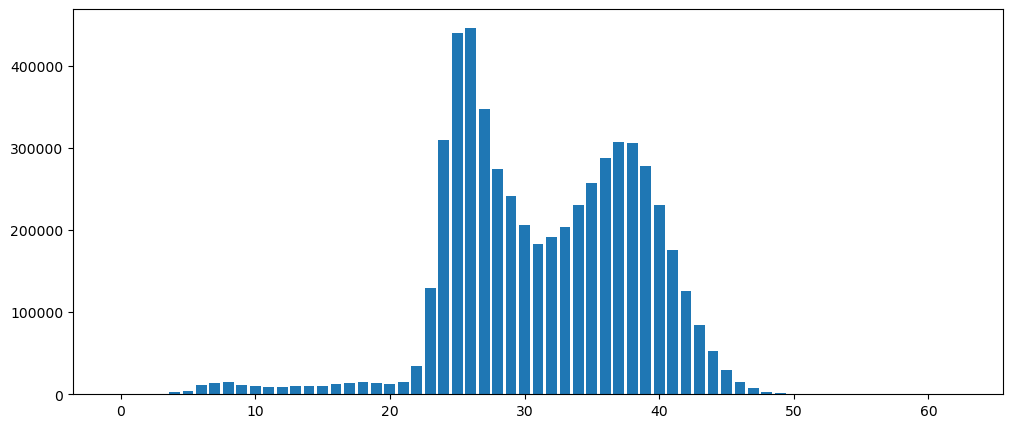

1 663
2 789
3 861
4 2619
5 4521
6 11715
7 14251
8 14671
9 11648
10 10174
11 9054
12 9338
13 10047
14 9508
15 10169
16 12205
17 14068
18 14759
19 13302
20 12427
21 14787
22 34831
23 129895
24 309842
25 440259
26 446805
27 348158
28 274154
29 241213
30 206368
31 183028
32 191428
33 203354
34 230762
35 257082
36 288037
37 307853
38 305771
39 278635
40 230428
41 175700
42 126099
43 84163
44 52251
45 30065
46 15295
47 7211
48 3180
49 1563
50 693
51 321
52 191
53 108
54 87
55 69
56 54
57 40
58 41
59 26
60 9
61 4
62 8


In [10]:
length_count = []
length_i = []
for i in range(0,max(lengths)):
    length_count.append(lengths.count(i))
    length_i.append(i)
plt.figure(figsize=[12,5])
plt.bar(length_i,length_count)
plt.xticks()
plt.show()

for i in length_i:
    if(length_count[i] != 0):
        print(i,length_count[i])

In [11]:
co_occur = []
co_occur_length = []
max_num = 1
max_i = 0
for i in range(len(paths)):
    #print(name[i],mutation_paths[i])
    temp = []
    for j in range(len(paths[i])):
        mutation = paths[i][j].split(',')
        if(len(mutation)>1):
            #print(mutation)
            if(max_num<len(mutation)):
                max_num = len(mutation)
                max_i = i
                print(max_num,max_i)
            temp.append(mutation)
            co_occur_length.append(len(mutation))
    co_occur.append(temp)

2 0
3 0
4 9
5 244
6 456
8 619
14 3678
15 13993
17 15116
18 23336
19 33160
22 48074
24 80205
104 82322
317 265139


In [12]:
length_count = []
length_i = []
for i in range(2,max_num+1):
    length_count.append(co_occur_length.count(i))
    length_i.append(i)
    if(length_count[i-2]!=0):
        print(length_i[i-2],',',length_count[i-2])

2 , 13176045
3 , 11334962
4 , 1931769
5 , 2519001
6 , 571438
7 , 42874
8 , 38782
9 , 2166173
10 , 62495
11 , 240673
12 , 1622
13 , 1895
14 , 59412
15 , 458
16 , 312
17 , 267
18 , 2047307
19 , 140
20 , 95
21 , 91
22 , 56
23 , 43
24 , 47
25 , 38
26 , 34
27 , 36
28 , 19
29 , 19
30 , 14
31 , 33
32 , 19
33 , 16
34 , 11
35 , 11
36 , 11
37 , 7
38 , 7
39 , 10
40 , 5
41 , 5
42 , 11
43 , 2
44 , 3
45 , 9
46 , 2
47 , 2
48 , 3
49 , 3
50 , 5
51 , 4
52 , 1
53 , 2
54 , 1
55 , 3
56 , 1
57 , 4
58 , 1
59 , 1
60 , 1
61 , 3
63 , 3
66 , 1
67 , 2
69 , 1
70 , 2
71 , 2
72 , 2
73 , 5
76 , 1
79 , 2
80 , 1
85 , 1
90 , 1
92 , 1
94 , 1
96 , 1
104 , 1
116 , 1
123 , 1
213 , 1
317 , 1


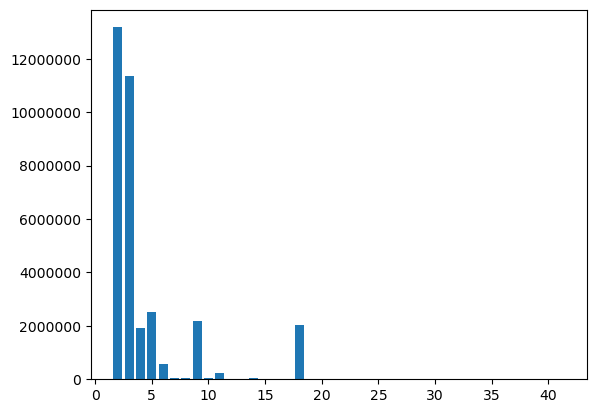

In [14]:
plt.bar(length_i[0:40],length_count[0:40])
plt.xticks()
plt.ticklabel_format(style='plain')
plt.show()